# Class imbalance
04/04/2022

In [2]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

### Get data

In [5]:
df = pd.read_csv("~/Downloads/creditcardfraud.zip")

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Turn into X and y

In [7]:
X = df.drop(["Class"], axis=1)
y = df['Class']

### This is imbalance
Rule of thumb, everything lower than 25 % is supposed to be imbalanced

In [8]:
y.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

Surely, this is imbalanced!!

### Evaluation function to test different models 

recall, TPR: $\frac{\text{TP}}{\text{P}} = \frac{\text{TP}}{\text{TP} + \text{FN}}$  

precision: $\frac{\text{TP}}{\text{TP} + \text{FP}}$   

f1-score: harmonic mean of recall and precision     

In [9]:
def print_evaluations(ytrue, ypred, model_name):
    print(f'Scores of the model {model_name}:')
    print(f'The accuracy of the model is: {round(accuracy_score(ytrue, ypred), 3)}')
    print(f'The precision of the model is: {round(precision_score(ytrue, ypred), 3)}')
    print(f'The recall of the model is: {round(recall_score(ytrue, ypred), 3)}')
    print(f'The f1-score of the model is: {round(f1_score(ytrue, ypred), 3)}')
    
    #print confusion matrix
    cm = confusion_matrix(ytrue, ypred)    
    disp = ConfusionMatrixDisplay(cm, display_labels=['non-fraud', 'fraud'])
    disp.plot()

Penalize more strongly misspredicted minority class samples -> Weighting (model-side adaptation)

### Test train split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)

In [11]:
y_train.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [12]:
y_test.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

### Naive predictor

In [13]:
dummy = DummyClassifier()

In [14]:
dummy.fit(X_train, y_train)

DummyClassifier()

In [15]:
ypred_test = dummy.predict(X_test)

Scores of the model Naive predictor:
The accuracy of the model is: 0.998
The precision of the model is: 0.0
The recall of the model is: 0.0
The f1-score of the model is: 0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


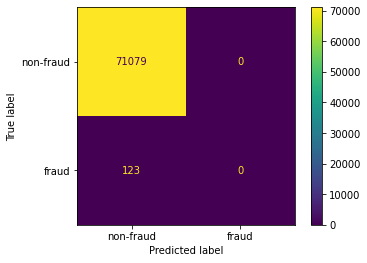

In [16]:
print_evaluations(y_test, ypred_test, "Naive predictor")

### Use RandomForestClassifier

In [17]:
rf_clf = RandomForestClassifier(max_depth=3, n_estimators=20, random_state=10)

In [18]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=20, random_state=10)

In [19]:
ypred_rf = rf_clf.predict(X_test)

Scores of the model Random Forest:
The accuracy of the model is: 0.999
The precision of the model is: 0.852
The recall of the model is: 0.61
The f1-score of the model is: 0.711


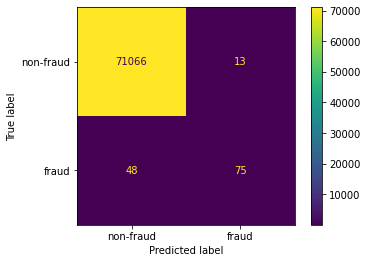

In [20]:
print_evaluations(y_test, ypred_rf, "Random Forest")

## Undersampling

In [21]:
rus = RandomUnderSampler(sampling_strategy=0.25, random_state=10)

In [22]:
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [23]:
y_train_rus.value_counts(normalize=True)

0    0.8
1    0.2
Name: Class, dtype: float64

In [24]:
rf_clf.fit(X_train_rus, y_train_rus)
rf_rus_predictions = rf_clf.predict(X_test)

Scores of the model RF undersampling:
The accuracy of the model is: 0.999
The precision of the model is: 0.59
The recall of the model is: 0.829
The f1-score of the model is: 0.689


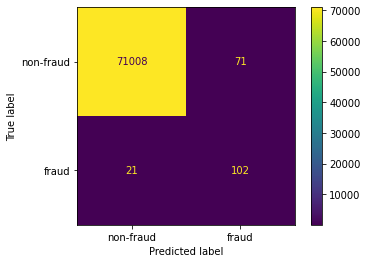

In [25]:
print_evaluations(y_test, rf_rus_predictions, "RF undersampling")

## Oversampling

In [227]:
ros = RandomOverSampler(sampling_strategy=0.25, random_state=10)

In [228]:
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [229]:
rf_clf.fit(X_train_ros, y_train_ros)
rf_ros_predictions = rf_clf.predict(X_test)

Scores of the model RF oversampling:
The accuracy of the model is: 0.999
The precision of the model is: 0.743
The recall of the model is: 0.821
The f1-score of the model is: 0.78


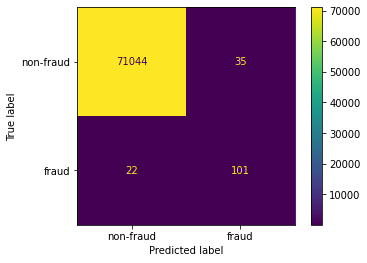

In [230]:
print_evaluations(y_test, rf_ros_predictions, "RF oversampling")

## Weights

In [231]:
rf_weight = RandomForestClassifier(max_depth=3, n_estimators=20, random_state=10, class_weight='balanced_subsample')

In [232]:
rf_weight.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=3,
                       n_estimators=20, random_state=10)

In [233]:
rf_weight_predictions = rf_weight.predict(X_test)

Scores of the model RF weights:
The accuracy of the model is: 0.992
The precision of the model is: 0.166
The recall of the model is: 0.846
The f1-score of the model is: 0.277


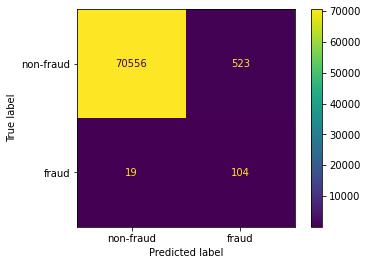

In [234]:
print_evaluations(y_test, rf_weight_predictions, "RF weights")

## SMOTE

In [235]:
smote = SMOTE(random_state=10)

In [236]:
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [237]:
rf_smote = RandomForestClassifier(max_depth=3, n_estimators=20, random_state=10)

In [238]:
rf_smote.fit(X_smote, y_smote)

RandomForestClassifier(max_depth=3, n_estimators=20, random_state=10)

In [239]:
smote_prediction = rf_smote.predict(X_test)

Scores of the model RF SMOTE:
The accuracy of the model is: 0.992
The precision of the model is: 0.16
The recall of the model is: 0.862
The f1-score of the model is: 0.27


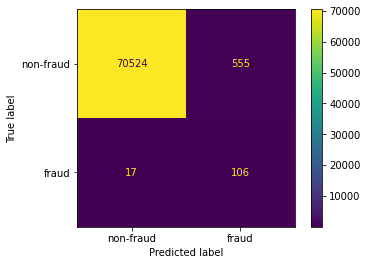

In [240]:
print_evaluations(y_test, smote_prediction, 'RF SMOTE')